<h1><center>
    ECE 438 - Laboratory 5a<br/>
    Digital Filter Design (Week 1)<br/>
    <small>Last updated on February 13, 2022</small><br/>
    <br/>
    Date:<br/>
    Section:<br/>
</center></h1>

|Name |Signature |Time spent outside lab|
|:---:|:---:|:---:|
|Student Name #1 [---%]| | |
|Student Name #2 [---%]| | |

||Below expectations| Lacks in some respect|Meets all expectations|
|:---:|:---:|:---:|:---:|
|**Completeness of the report**||||
|**Organization of the report**||||
|**Quality of figures**: *Correctly labeled with title, x-axis, y-axis, and name(s)*||||
|**Understanding and implementation of simple FIR filter (40 pts)**: *Difference eq., flow diagram, impulse response, plots of magnitude response, plots of original and filtered signals and their DTFT, matlab code, questions*||||
|**Understanding and implementation of simple IIR filter (40 pts)**: *Difference eq., flow diagram, impulse response, plots of magnitude response, plots of original and filtered signals and their DTFT, matlab code, questions*||||
|**Understanding parameters of lowpass filter design (20 pts)**: *Magnitude response plots with marked regions, questions*||||

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
import IPython.display as ipd

In [7]:
# make sure the plot is displayed in this notebook
%matplotlib inline
# specify the size of the plot
plt.rcParams['figure.figsize'] = (16, 6)

# for auto-reloading extenrnal modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<h3 style="color:red;"><left>Exercise 3.1</left></h3>

**1. Submit the difference equation for the filter $H_f(z)$.**

$y(n) = x(n) - 2cos(\theta)x(n-1) + x(n-2)$

**2. Submit the system diagram of the impulse response for the filter $H_f(z)$.**

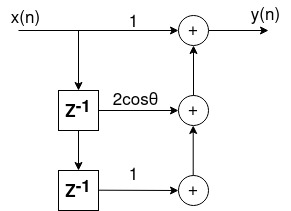Insert your answer here

**3. Submit the analytical expression of the impulse response for the filter $H_f(z)$.**

$h(n) = \delta(n) - 2cos(\theta)\delta(n-1) + \delta(n-2)$

**4. Write Python code to compute and plot the magnitude of the filter’s frequency response $|H_f(e^{j\omega})|$ as a function of $\omega$ on the interval $−\pi < \omega < \pi$, for the following three values of $\theta$:**

* $\theta=\pi/6$
* $\theta=\pi/3$
* $\theta=\pi/2$

Text(0.5, 1.0, '$\theta=\\pi/2$')

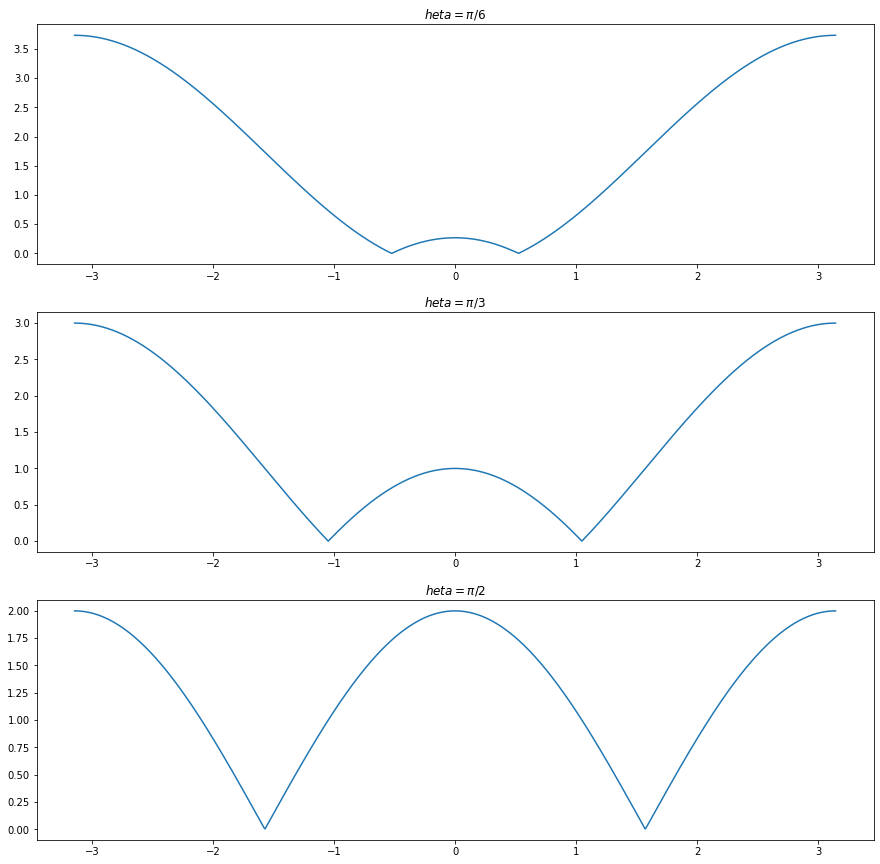

In [8]:
# insert your code here
w = np.linspace(-np.pi, np.pi, 1000)

theta_1 = np.pi/6
theta_2 = np.pi/3
theta_3 = np.pi/2

fig, axs = plt.subplots(3, figsize=(15,15))

Hf_1 = 1 - 2*np.cos(theta_1)*np.exp(-1j*w) + np.exp(-2j*w)
axs[0].plot(w, np.abs(Hf_1))
axs[0].set_title("$\theta=\pi/6$")

Hf_2 = 1 - 2*np.cos(theta_2)*np.exp(-1j*w) + np.exp(-2j*w)
axs[1].plot(w, np.abs(Hf_2))
axs[1].set_title("$\theta=\pi/3$")

Hf_3 = 1 - 2*np.cos(theta_3)*np.exp(-1j*w) + np.exp(-2j*w)
axs[2].plot(w, np.abs(Hf_3))
axs[2].set_title("$\theta=\pi/2$")


**5. Explain how the value of $\theta$ affects the magnitude of the filter's frequency response.**

Magnitude is zero at positive and negative $\theta$

<h3 style="color:red;"><left>Exercise 3.2</left></h3>

In the next experiment, we will use the filter $H_f(z)$ to remove an undesirable sinusoidal interference from a speech signal. To run the experiment, load ```nspeech1.npy``` into Python using the command ```nspeech1 = np.load("nspeech1.npy")```.

**1. Play ```nspeech1``` using the command ```ipd.Audio(nspeech1, rate=8000)```.**

In [9]:
# insert your code here
nspeech1 = np.load("nspeech1.npy")
ipd.Audio(nspeech1, rate=8000)

**2. Plot $101$ samples of the signal for the time indices ```[99:200]```.**

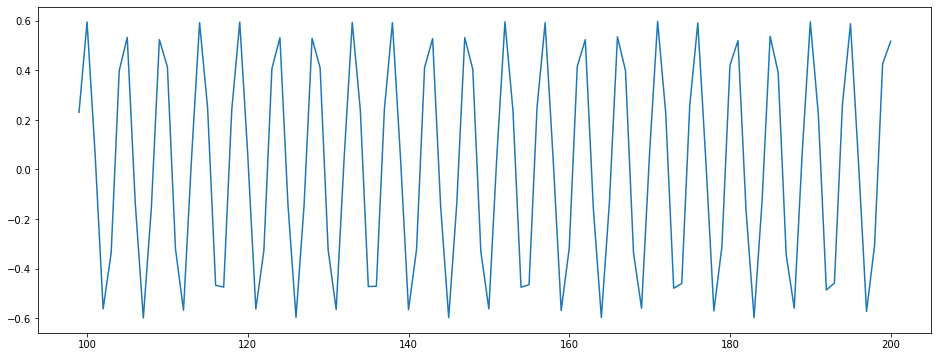

In [64]:
# insert your code here
n = np.arange(99, 200+1, 1)
plt.plot(n, nspeech1[n])

---

We will next use the ```DTFT``` function provided in the file ```helper.py``` to compute samples of the DTFT of the audio signal. Run the following code to import the function. Note that the command ```X, w = DTFT(x, 0)``` will generate a DTFT that is the same duration as the input; if this is not sufficient, it may be increased by specifying ```M```.

In [11]:
from helper import DTFT

**3. Compute the the DTFT of $1001$ samples of the audio signal for the time indices ```[99:1100]```. Then plot the magnitude of the DTFT samples versus frequency for $|\omega|<\pi$.**

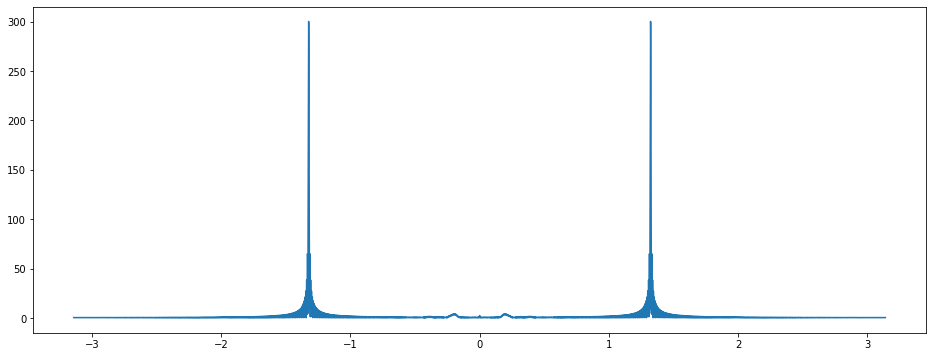

In [90]:
# insert your code here
X, w = DTFT(nspeech1[99:1100], 10010)
plt.plot(w, np.abs(X))

---

Notice that there are two large peaks corresponding to the sinusoidal interference signal in the plot you drew above.

**4. Use the command [```np.argmax()```](https://numpy.org/doc/stable/reference/generated/numpy.argmax.html) to determine the exact frequency of the peaks. This will
be the value of $\theta$ that we will use for filtering with $H_f(z)$. Print out the result.**

**Hint:** use the command ```idx_max = np.argmax(np.abs(X))``` to find the index of the maximum element in ```X```. Then $\theta$ can be derived using this index.

In [91]:
# insert your code here
idx_max = np.argmax(np.abs(X))
theta = w[idx_max]
display(theta)



-1.3234419247483373

**5. Complete the function ```FIRfilter``` that implements the filter $H_f(z)$ with the measured value of $\theta$ and outputs the filtered signal (Hint: Use ```np.convolve()```).**

In [92]:
def FIRfilter(x, theta):
    y = np.convolve([1, -2*np.cos(theta), 1], x)
    return y

**6. Apply the new function ```FIRfilter``` to the ```nspeech1``` vector to attenuate the sinusoidal interference. Listen to the filtered signal to hear the effects of the filter.**

In [93]:
# insert your code here
nspeech1_filtered = FIRfilter(nspeech1, theta)
ipd.Audio(nspeech1_filtered, rate=8000)

**7. Comment on how the filtering changed the quality of the audio signal.**

Insert your answer here

**8. Plot $101$ samples of the filtered signal for the time indices ```[99:200]```.**

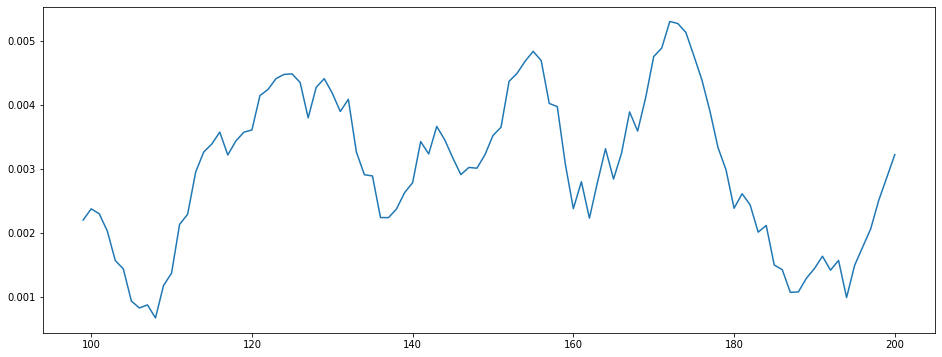

In [94]:
# insert your code here
n = np.arange(99, 200+1, 1)
plt.plot(n, nspeech1_filtered[n])

**9. Plot the magnitude of the DTFT of 1001 samples of the filtered signal for the time indices ```[99:1100]```.**

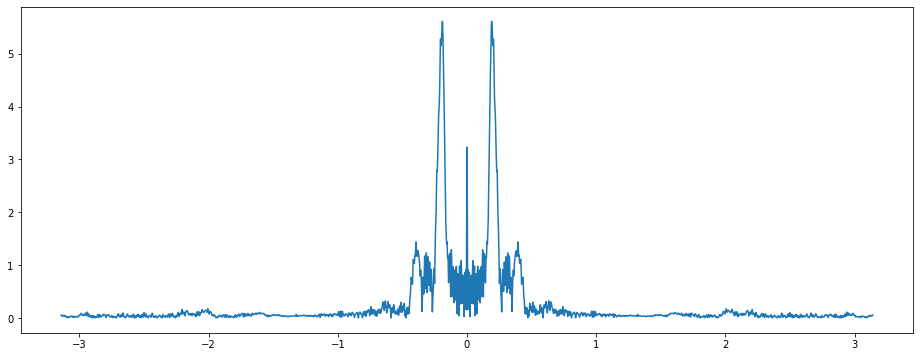

In [95]:
# insert your code here
X, w = DTFT(nspeech1_filtered[99:1100], 10010)
plt.plot(w, np.abs(X))

**10. Is the filter we used a lowpass, highpass, bandpass, or a bandstop filter? Comment on how the frequency content of the signal changed after filtering.**

Inser your answer here

<h3 style="color:red;"><left>Exercise 4.1</left></h3>

**1. Submit the difference equation for the filter $H_i(z)$.**

$y(n) = (1-r)x(n) + 2rcos(\theta)y(n-1) - r^2y(n-2)$

**2. Submit the system diagram of the impulse response for the filter $H_i(z)$.**

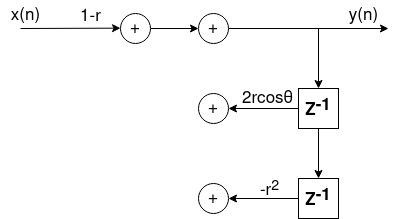insert your answer here

**3. Submit the analytical expression of the impulse response for the filter $H_i(z)$.**

**Hint:** the frequency response of the system can be obtained by restricting the $Z$-transform to the unit circle. So the DTFT of $h_i[n]$ is $H_i(e^{j\omega})$. Therefore, to get $h_i[n]$, you can take the inverse Fourier transform of $H_i(e^{j\omega})$.

$h(n) = (1-r)\delta(n) + 2rcos(\theta)h(n-1) - r^2h(n-2)$

**4. Write Python code to calculate and plot the magnitude of the filter’s frequency response $|H_i(e^{j\omega})|$ on $|\omega| < \pi$ for $\theta = \pi/3$ and the following three values of $r$:**
* $r=0.99$
* $r=0.9$
* $r=0.7$

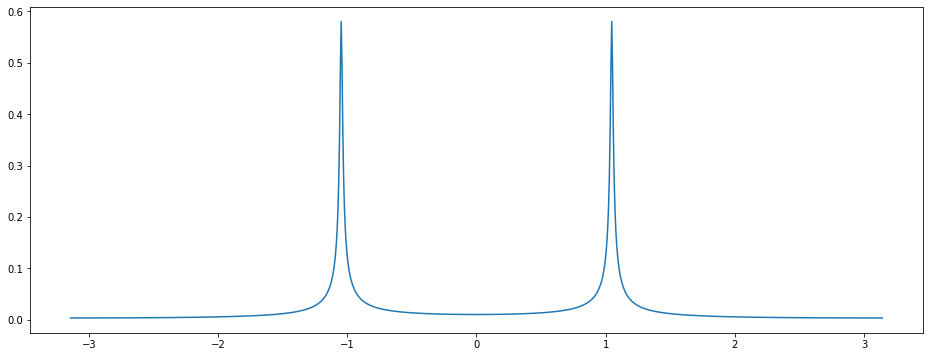

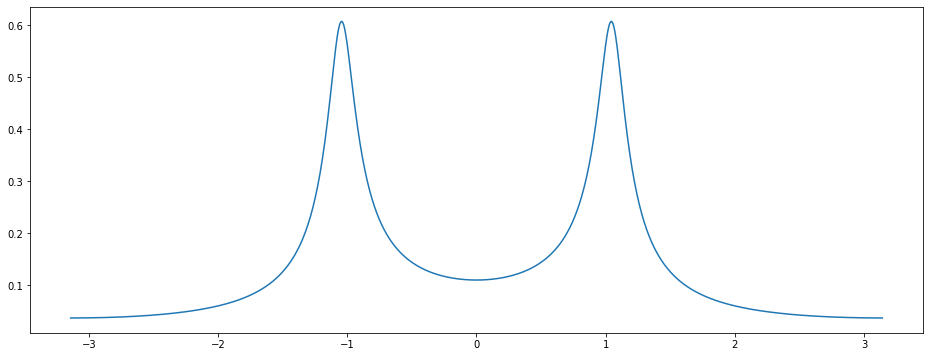

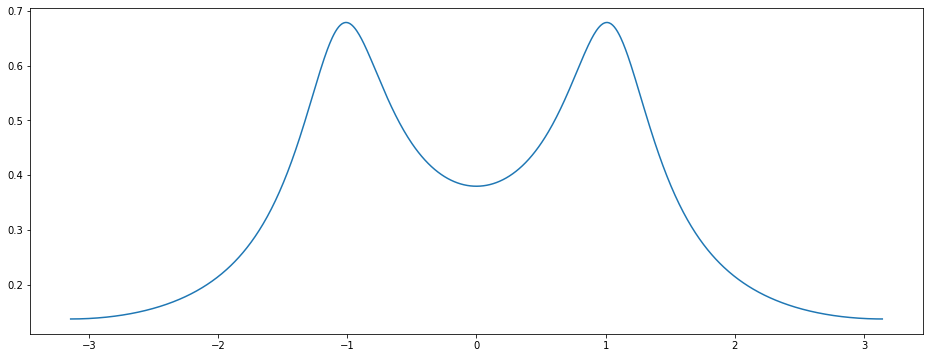

In [99]:
# insert your code here
w = np.linspace(-np.pi, np.pi, 1000)
theta = np.pi/3

r_1 = 0.99
r_2 = 0.9
r_3 = 0.7

H_1 = (1-r_1) / (1 - 2*r_1*np.cos(theta)*np.exp(-1j*w) + r_1**2*np.exp(-2j*w))
plt.plot(w, np.abs(H_1))
plt.show()

H_2 = (1-r_2) / (1 - 2*r_2*np.cos(theta)*np.exp(-1j*w) + r_2**2*np.exp(-2j*w))
plt.plot(w, np.abs(H_2))
plt.show()

H_3 = (1-r_3) / (1 - 2*r_3*np.cos(theta)*np.exp(-1j*w) + r_3**2*np.exp(-2j*w))
plt.plot(w, np.abs(H_3))
plt.show()

**5. Explain how the value of $r$ affects this magnitude.**

insert your answer here

<h3 style="color:red;"><left>Exercise 4.2</left></h3>

In the following experiment, we will use the filter $H_i(z)$ to separate a modulated sinusoid from background noise.

**1. Load the file ```pcm.npy``` and play it.**

In [136]:
# insert your code here
pcm = np.load("pcm.npy")
ipd.Audio(pcm, rate=8000)

**2. Plot $101$ samples of the signal for the time indices ```[99:200]```.**

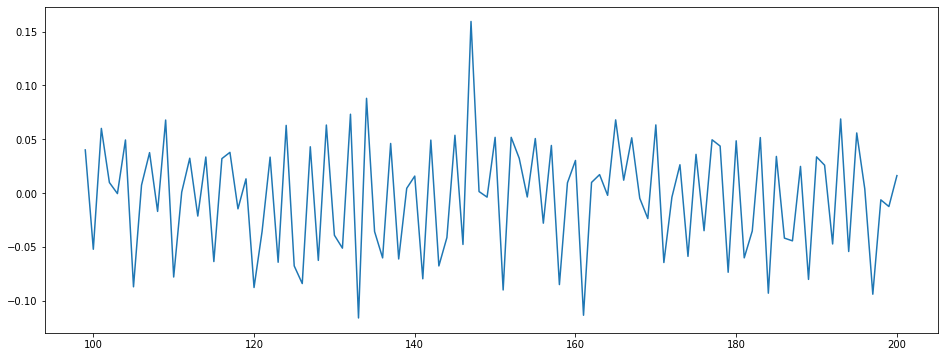

In [137]:
# insert your code here
n = np.arange(99,200+1,1)
plt.plot(n, pcm[n])


**3. Compute the the DTFT of $1001$ samples of the audio signal for the time indices ```[99:1100]```. Then plot the magnitude of the DTFT samples versus frequency for $|\omega|<\pi$.**

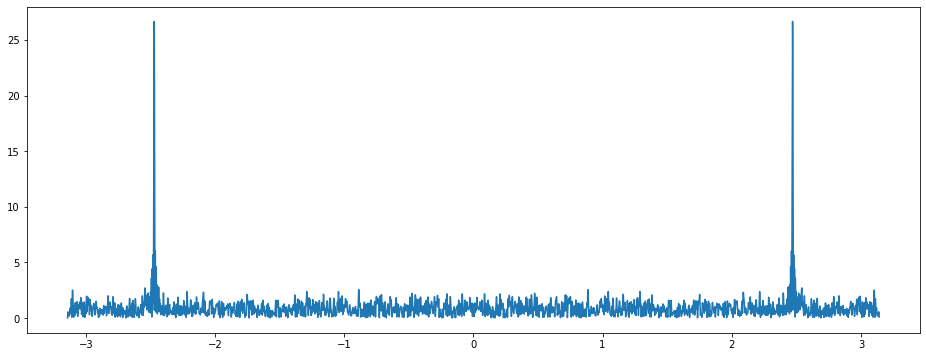

In [151]:
# insert your code here
X, w = DTFT(pcm[99:1100], 10010)
plt.plot(w, np.abs(X))

---

The two peaks in the spectrum correspond to the center frequency of the modulated signal. The low amplitude wideband content is the background noise. In this exercise, you will use the IIR filter described above to amplify the desired signal, relative to the background noise.

**4. The pcm signal is modulated at $3146\text{ Hz}$ and sampled at $8\text{ kHz}$. Use these values to calculate the value of $\theta$ for the filter $H_i(z)$. Remember from the sampling theorem that a radial frequency of $2\pi$ corresponds to the sampling frequency. Print out the value of $\theta$.**

In [152]:
# insert your code here
theta = 2 * np.pi * 3146 / 8000

**5. Plot the magnitude of the DTFT for $\omega$ in the range $[\theta−0.02, \theta+0.02]$.**

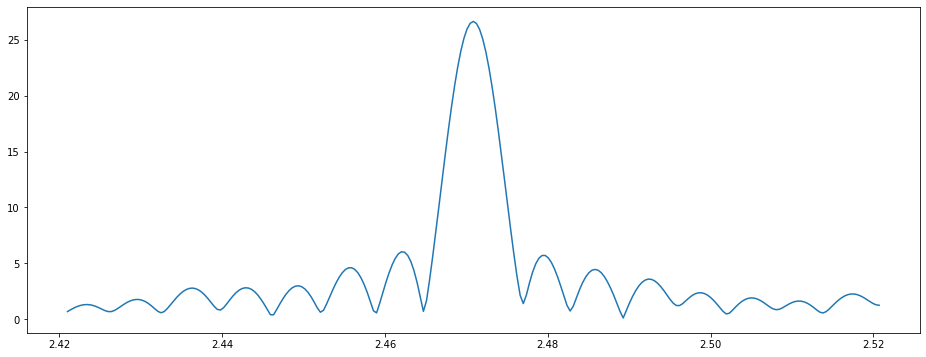

In [153]:
# insert your code here
w_range = np.where((w >= (theta - 0.05)) & (w <= (theta + 0.05)))
#display(w[w_range])
plt.plot(w[w_range], np.abs(X[w_range]))

**6. Complete the function ```IIRfilter``` that implements the filter $H_i(z)$. In this case, you need to use a for loop to implement the recursive difference equation. Use your calculated value of $\theta$ and $r = 0.995$. You can assume that $y[n]$ is equal to $0$ for negative values of $n$.**

In [154]:
def IIRfilter(x, theta):
    r = 0.995
    y = np.zeros(len(x))
    y[0] = (1-r)*x[0]
    y[1] = (1-r)*x[1] + 2*r*np.cos(theta)*y[0]
    for i in range(2, len(y)):
      y[i] = (1-r)*x[i] + 2*r*np.cos(theta)*y[i-1] - r**2*y[i-2]

    return y

**7. Apply the function ```IIRfilter``` to the signal ```pcm``` to separate the desired signal from the background noise, and listen to the filtered signal to hear the effects.**

In [155]:
# insert your code here
pcm_filtered = IIRfilter(pcm, theta)
ipd.Audio(pcm_filtered, rate=8000)

**8. Comment on how the signal sounds before and after filtering.**

insert your answer here

**9. Plot the filtered signal for indices ```[99:200]```.**

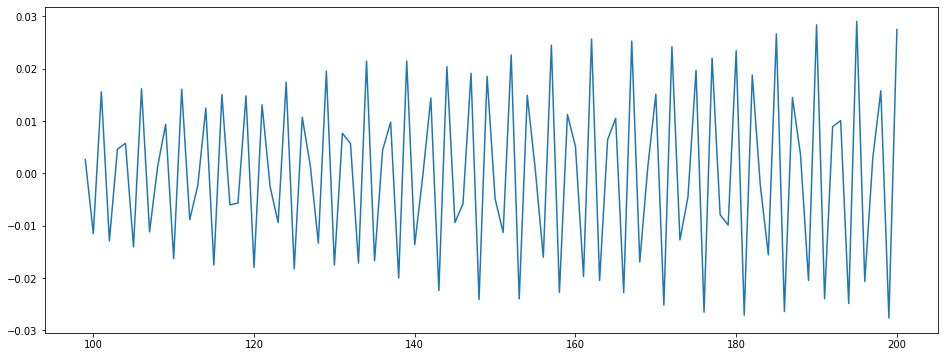

In [156]:
# insert your code here
n = np.arange(99,200+1,1)
plt.plot(n, pcm_filtered[n])

**10. Compute the DTFT of $1001$ samples of the filtered signal using the time indices ```[99:1100]``` and plot the magnitude of this DTFT.**

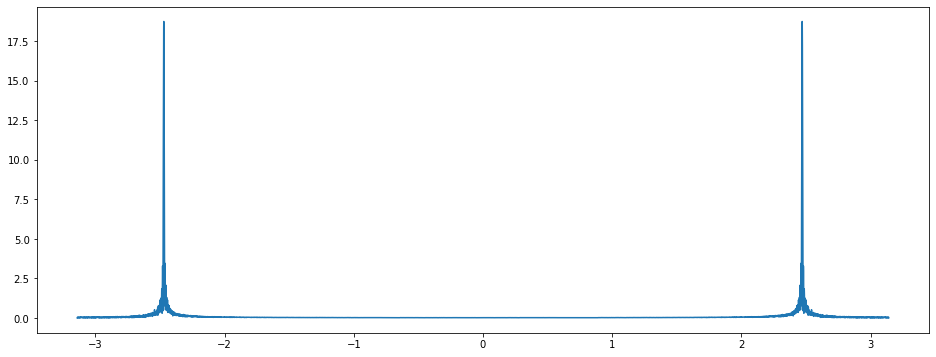

In [157]:
# insert your code here
X, w = DTFT(pcm_filtered[99:1100], 10010)
plt.plot(w, np.abs(X))

**11. In order to see the DTFT around $\omega = \theta$ more clearly, plot also the portion of this DTFT for the values of $\omega$ in the range $[\theta − 0.02, \theta + 0.02]$. Use your calculated value of $\theta$.**

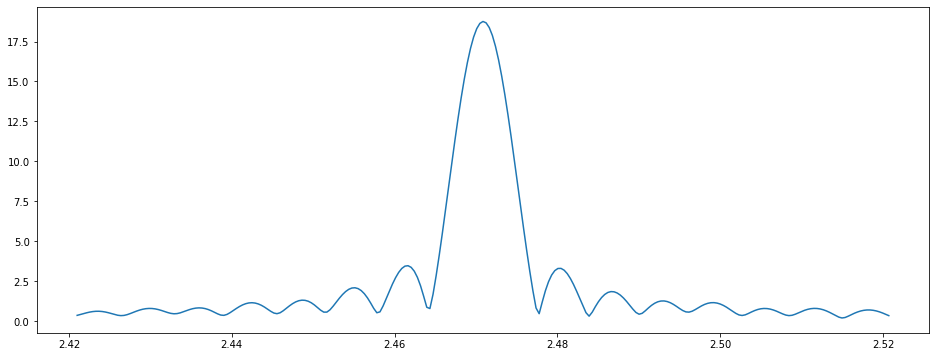

In [158]:
# insert your code here
w_range = np.where((w >= (theta - 0.05)) & (w <= (theta + 0.05)))
#display(w[w_range])
plt.plot(w[w_range], np.abs(X[w_range]))

**12. Comment on how the signal looks before and after filtering.**

insert your answer here

**13. How would you expect changes in $r$ to change the filtered output? Would a value of $r = 0.9999999$ be effective for this application? Why might such a value for $r$ be ill-advised? (Consider the spectrum of the desired signal around $\omega = \theta$.)**

insert your answer here

<h3 style="color:red;"><left>Exercise 5.1</left></h3>

**1. To examine the effect of filter size on the frequency characteristics of the filter, complete the function ```LPFtrunc(N)``` that computes the truncated and shifted impulse response of size ```N``` for a low pass filter with a cutoff frequency of $\omega_c = 2.0$.**

In [29]:
def LPFtrunc(N):
    """
    Parameters:
    ---
    N: the size
    
    Returns
    ---
    h: the truncated and shifted impulse response
    """
    h = None
    return h

**2. For each of the following filter sizes, compute the filter’s DTFT.**
* $N=21$
* $N=101$

**Hints:** To get an accurate representation of the DTFT make sure that you compute at
least $512$ sample points using the command ```X, w = DTFT(filter_response, 512)```.

In [30]:
# insert your code here


**3. Plot the magnitude of both filters' DTFTs. On each of the plots, mark the passband, the transition band and the stopband.**

In [31]:
# insert your code here


**4. Plot the magnitude of both filters' DTFTs in decibels.**

**Hint:** the magnitude of the response in decibels is given by $|H_{\text{dB}}(e^{j\omega})| = 20 \log10 |H(e^{j\omega})|$. Note that the ```np.log``` command in Python computes the natural logarithm. Therefore, use the ```np.log10``` command to compute
decibels. 

In [32]:
# insert your code here


**5. Explain how the filter size effects the stopband ripple. Why does it have this effect?**

insert your answer here

**6. Load the file ```nspeech2.npy``` and play it. Also, note the quality of the speech and background noise.**

In [33]:
# insert your code here


**7. Apply the two filters with the above sizes to this signal. Since these are FIR filters, you can simply convolve them with the audio signal. Listen carefully to the unfiltered and filtered signals, and note the result. Can you hear a difference between the two filtered signals? In order to hear the filtered signals better, you may want to multiply each of them by 2 or 3 before using sound.**

In [34]:
# first filter


In [35]:
# second filter


insert your answer here

**8. Comment on the quality of the filtered signals. Does the filter size have a noticeable
effect on the audio quality?**

insert your answer here